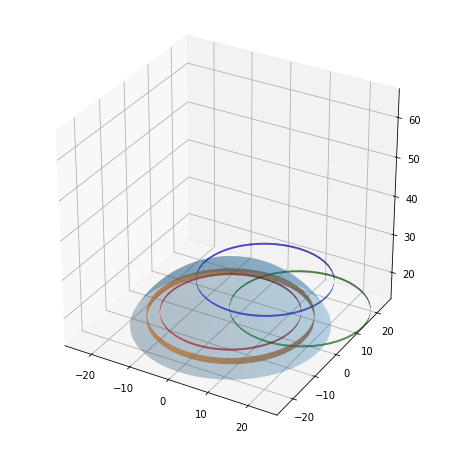

In [178]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

n_theta = 50 
n_phi = 80 
r = 26        

theta, phi = np.mgrid[0.0:0.5*np.pi-0.5:n_theta*1j, 0.0:2.0*np.pi:n_phi*1j]

x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

inp = []
for j in phi[0,:]:
    for i in theta[:,0]:
        val = 0.7+np.cos(j)*np.sin(i+np.pi/4.)# put something useful here
        inp.append([j, i, val])
inp = np.array(inp)
 
c = inp[:,2].reshape((n_phi,n_theta)).T

cz = np.linspace(0, 1.6, 50)
cz_A = np.linspace(0, 0.5, 50)

ctheta = np.linspace(0, 2*np.pi, 50)
theta_grid, z_grid=np.meshgrid(ctheta, cz)
theta_grid_A, z_grid_A=np.meshgrid(ctheta, cz_A)
x_grid = 19*np.cos(theta_grid) + 0
y_grid = 19*np.sin(theta_grid) + 0

PAx_grid = 16*np.cos(theta_grid) + 0
PAy_grid = 16*np.sin(theta_grid) + 0
PBx_grid = 16*np.cos(theta_grid) + 0
PBy_grid = 16*np.sin(theta_grid) + 16
PCx_grid = 16*np.cos(theta_grid) + 13
PCy_grid = 16*np.sin(theta_grid) + 9

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x,y,z,  rstride=1, cstride=1, alpha=0.3, linewidth=1) 
ax.set_xlim([-26,26])
ax.set_ylim([-26,26])
ax.set_zlim([14,66])
ax.set_aspect("equal")
ax.plot_surface(x_grid,y_grid,z_grid+14)
ax.plot_surface(PAx_grid,PAy_grid,z_grid_A+15.6,color='red')
ax.plot_surface(PBx_grid,PBy_grid,z_grid_A+15.6,color='blue')
ax.plot_surface(PCx_grid,PCy_grid,z_grid_A+15.6,color='green')

plt.show()


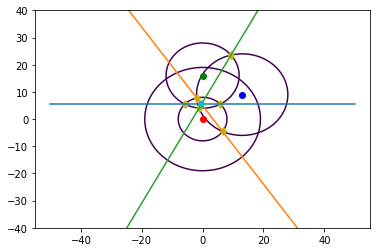

In [174]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.linspace(-50, 50, 1000)
x_1 = np.linspace(-10, 10, 1000)
y = np.linspace(-50, 50, 1000)
X, Y = np.meshgrid(x,y)
CA = [0,0]
CB = [0,16]
CC = [13,9]
RA = 8
RB = 12
RC = 15
RLc = 19


A = (X-CA[0])**2 + (Y-CA[1])**2 - RA**2
B = (X-CB[0])**2 + (Y-CB[1])**2 - RB**2
C = (X-CC[0])**2 + (Y-CC[1])**2 - RC**2
Lc = (X-CA[0])**2 + (Y-CA[1])**2 - RLc**2


distAB = math.sqrt((CB[0] - CA[0])**2 + (CB[1] - CA[1])**2)
distAC = math.sqrt((CC[0] - CA[0])**2 + (CC[1] - CA[1])**2)  
distBC = math.sqrt((CC[0] - CB[0])**2 + (CC[1] - CB[1])**2)  


ABex = (CB[0]-CA[0])/distAB
ACex = (CC[0]-CA[0])/distAC
BCex = (CC[0]-CB[0])/distBC


ABey = (CB[1]-CA[1])/distAB
ACey = (CC[1]-CA[1])/distAC
BCey = (CC[1]-CB[1])/distBC

ABx = (RA * RA - RB * RB + distAB * distAB) / (2 * distAB)
ABy= math.sqrt(RA * RA - ABx * ABx)

ACx = (RA * RA - RC * RC + distAC * distAC) / (2 * distAC)
ACy= math.sqrt(RA * RA - ACx * ACx)

BCx = (RB * RB - RC * RC + distBC * distBC) / (2 * distBC)
BCy= math.sqrt(RB * RB - BCx * BCx)


ABcp_X_1 = CA[0] + ABx * ABex - ABy * ABey
ABcp_Y_1 = CA[1] + ABx * ABey + ABy * ABex


ABcp_X_2 = CA[0] + ABx * ABex + ABy * ABey
ABcp_Y_2 = CA[1] + ABx * ABey - ABy * ABex


ACcp_X_1 = CA[0] + ACx * ACex - ACy * ACey
ACcp_Y_1 = CA[1] + ACx * ACey + ACy * ACex

ACcp_X_2 = CA[0] + ACx * ACex + ACy * ACey
ACcp_Y_2 = CA[1] + ACx * ACey - ACy * ACex

BCcp_X_1 = CB[0] + BCx * BCex - BCy * BCey
BCcp_Y_1 = CB[1] + BCx * BCey + BCy * BCex

BCcp_X_2 = CB[0] + BCx * BCex + BCy * BCey
BCcp_Y_2 = CB[1] + BCx * BCey - BCy * BCex

ABIm = (ABcp_Y_2-ABcp_Y_1)/(ABcp_X_2-ABcp_X_1)
ABc = ABcp_Y_1-ABIm*ABcp_X_1
ABIeq = ABIm*x+ABc


ACIm = (ACcp_Y_2-ACcp_Y_1)/(ACcp_X_2-ACcp_X_1)
ACc = ACcp_Y_1-ACIm*ACcp_X_1
ACIeq = ACIm*x+ACc

BCIm = (BCcp_Y_2-BCcp_Y_1)/(BCcp_X_2-BCcp_X_1)
BCc = BCcp_Y_1-BCIm*BCcp_X_1
BCIeq = BCIm*x+BCc


Center = (ABc-BCc)/BCIm

plt.contour(X,Y,A,[0])
plt.contour(X,Y,B,[0])
plt.contour(X,Y,C,[0])
plt.contour(X,Y,Lc,[0])

plt.plot(CA[0],CA[1], 'ro')
plt.plot(CB[0],CB[1], 'go')
plt.plot(CC[0],CC[1], 'bo')
plt.plot(ABcp_X_1,ABcp_Y_1,'yd')
plt.plot(ABcp_X_2,ABcp_Y_2,'yd')
plt.plot(ACcp_X_1,ACcp_Y_1,'yd')
plt.plot(ACcp_X_2,ACcp_Y_2,'yd')
plt.plot(BCcp_X_1,BCcp_Y_1,'yd')
plt.plot(BCcp_X_2,BCcp_Y_2,'yd')

plt.plot(x,ABIeq)
plt.plot(x,ACIeq)
plt.plot(x,BCIeq)

plt.plot(Center,ABc,'cd')
plt.ylim([-40, 40])
plt.xlim([-55, 55])

# plt.grid();
plt.show()

